### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

###                                  BUAN 6341.002 - Group 5                              
###                                  Machine Learning Project 2 - Classification                               
### Group Members:
### AXS170059 - Arvind Shankar Raman
### SXA170055 - Srinivasahanumantha Ramasarma Annaparthi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

To make sure that the whole output is printed and to handle warnings.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

We begin by importing the 2 csv files : audit_risk.csv and trial.csv

In [3]:
audit_risk = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

### Exploratory Data Analysis

First , let us analyze audit_risk.

In [4]:
print(audit_risk.shape)
audit_risk.info()

(776, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null f

1.Audit_risk contains 776 rows and 27 columns.
2.All columns contain 776 non-null values except Money_Value which contains 775 non-null values and one null value
3.Datatype breakdown:
 a.Columns 'District_Loss','Money_Value' and 'Risk' are int64.
 b.Column 'LOCATION_ID' is of object datatype and the remaining are float64.


Now, let's the repeat the same for trial.

In [5]:
print(trial.shape)
trial.info()

(776, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


1.trial contains 776 rows and 18 columns.
2.All columns contain 776 non-null values except Money_Value which contains 775 non-null values and one null value.
3.Datatype breakdown:
 a.Columns 'District_Loss' and 'History' are int64.
 b.Column 'LOCATION_ID' is of object datatype and the remaining are float64.

We see that there is a null value present in the Money_Value column in both audit_risk and trial.
So first, I locate the row to understand about the other values present in the row.

In [6]:
print(audit_risk[audit_risk.isnull().any(axis=1)])
print(trial[trial.isnull().any(axis=1)])

     Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
642         55.57           4    0.23      0.2   0.046     0.0      0.2   

     Risk_B  TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  \
642     0.0   0.23      5.0  ...     0.4        0   0.2     0.0    2.0   

     Inherent_Risk  CONTROL_RISK  Detection_Risk  Audit_Risk  Risk  
642          1.446           0.4             0.5      0.2892     0  

[1 rows x 27 columns]
     Sector_score LOCATION_ID  PARA_A  SCORE_A  PARA_B  SCORE_B  TOTAL  \
642         55.57           4    0.23        2     0.0        2   0.23   

     numbers  Marks  Money_Value  MONEY_Marks  District  Loss  LOSS_SCORE  \
642      5.0      2          NaN            2         2     0           2   

     History  History_score  Score  Risk  
642        0              2    2.0     0  


Now since the Money_Value has a null value present, it is important to impute the null value. So let us have a look at the variance of the column in the both the datasets to see what value would be appropriate to impute with.

In [7]:
print(audit_risk['Money_Value'].describe())
print(trial['Money_Value'].describe())

count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64
count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64


We can observe clearly that the Standard deviation(66.606) is greater than the mean(14.13). So we impute the one missing value with the median.

In [8]:
mv_median = audit_risk['Money_Value'].median()
print(mv_median)
audit_risk['Money_Value'].fillna(mv_median,inplace=True)
trial_mv_median = trial['Money_Value'].median()
print(trial_mv_median)
trial['Money_Value'].fillna(trial_mv_median,inplace=True)
print(audit_risk['Money_Value'].loc[642])
print(trial['Money_Value'].loc[642])

0.09
0.09
0.09
0.09


We have sucessfully handled the missing values in both the datasets. The next step would be to merge them to a single dataframe, for ease of visualizations and running models.But it is evident that there are a lot of columns with the same name present in both the datasets. So we have to check which columns have equal values present in both the datsets so that we can merge both the datasets on the equal columns.

In [9]:
def common_column(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
common_columns=list(common_column(list(audit_risk.columns),list(trial.columns)))
def common_checker(x):
    for i in x:
        print(i,(audit_risk[i]==trial[i]).sum())
common_checker(common_columns)

Sector_score 776
LOCATION_ID 776
PARA_A 776
PARA_B 776
TOTAL 776
numbers 776
Money_Value 776
History 776
Score 776
Risk 595


We can see clearly that there are 8 common columns in the same data set with the same name and with equal values. Even though the risk column has the same variable name in both the datasets, it is not a common column since the values in the variable are not matching in both the datasets. So let us merge the two dataframes into a single dataframe on the 8 common columns.

In [10]:
audit_risk['Risk'].describe()

count    776.000000
mean       0.393041
std        0.488741
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Risk, dtype: float64

In [11]:
trial['Risk'].describe()

count    776.000000
mean       0.626289
std        0.484100
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Risk, dtype: float64

In [12]:
df= pd.merge(audit_risk,trial,how='inner',
             left_on =['Sector_score','LOCATION_ID','PARA_A','PARA_B','TOTAL','numbers','Money_Value','History','Score'],
             right_on =['Sector_score','LOCATION_ID','PARA_A','PARA_B','TOTAL','numbers','Money_Value','History','Score'])
print(df.shape)
df.info()

(810, 36)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 36 columns):
Sector_score      810 non-null float64
LOCATION_ID       810 non-null object
PARA_A            810 non-null float64
Score_A           810 non-null float64
Risk_A            810 non-null float64
PARA_B            810 non-null float64
Score_B           810 non-null float64
Risk_B            810 non-null float64
TOTAL             810 non-null float64
numbers           810 non-null float64
Score_B.1         810 non-null float64
Risk_C            810 non-null float64
Money_Value       810 non-null float64
Score_MV          810 non-null float64
Risk_D            810 non-null float64
District_Loss     810 non-null int64
PROB              810 non-null float64
RiSk_E            810 non-null float64
History           810 non-null int64
Prob              810 non-null float64
Risk_F            810 non-null float64
Score             810 non-null float64
Inherent_Risk     810 non-null f

1.The new merged dataframe 'df' consists of 810 rows and 36 columns.
2.There are no non-null values present now since the median imputation has already been performed.
So now, it is important to check if any dirty values are present in 'df'.

In [13]:
print(audit_risk.describe(include='all'))
for variable in df:
    if df[variable].nunique()<25:
        print(variable,df[variable].unique())

        Sector_score LOCATION_ID      PARA_A     Score_A      Risk_A  \
count     776.000000         776  776.000000  776.000000  776.000000   
unique           NaN          45         NaN         NaN         NaN   
top              NaN           8         NaN         NaN         NaN   
freq             NaN          76         NaN         NaN         NaN   
mean       20.184536         NaN    2.450194    0.351289    1.351029   
std        24.319017         NaN    5.678870    0.174055    3.440447   
min         1.850000         NaN    0.000000    0.200000    0.000000   
25%         2.370000         NaN    0.210000    0.200000    0.042000   
50%         3.890000         NaN    0.875000    0.200000    0.175000   
75%        55.570000         NaN    2.480000    0.600000    1.488000   
max        59.850000         NaN   85.000000    0.600000   51.000000   

             PARA_B     Score_B      Risk_B        TOTAL     numbers  ...  \
count    776.000000  776.000000  776.000000   776.000000  

As we can see, there are no dirty values present in df.Next, it is important to remove duplicates from the dataframe.

In [14]:
x = df
x.drop_duplicates(keep='first', inplace=True)
x.shape

(763, 36)

The new dataframe 'x' which is created after removing duplicates consists of 763 rows and 36 columns.The next step is to check for correlation between the variables. We can check for pair-wise correlation between all the variables in 'x' by using a correlation heatmap.

One of the feedbacks we received in Project-1 was "Similar columns of different scale should be explained and then one of them should be removed."
Explanation and Solution: We are running a correlation heatmap and have programmed a correlation handling user defined function, which in turn removes similar columns of different scale as they tend be highly correlated.This can be observed in the correlation heatmap given above. Some of the examples of such column pairs in this dataset are : (Score-A,SCORE_A), (Score-B,SCORE_B). and after the passing through the correlation function, SCORE_A,SCORE_B are other columns are removed respectively.

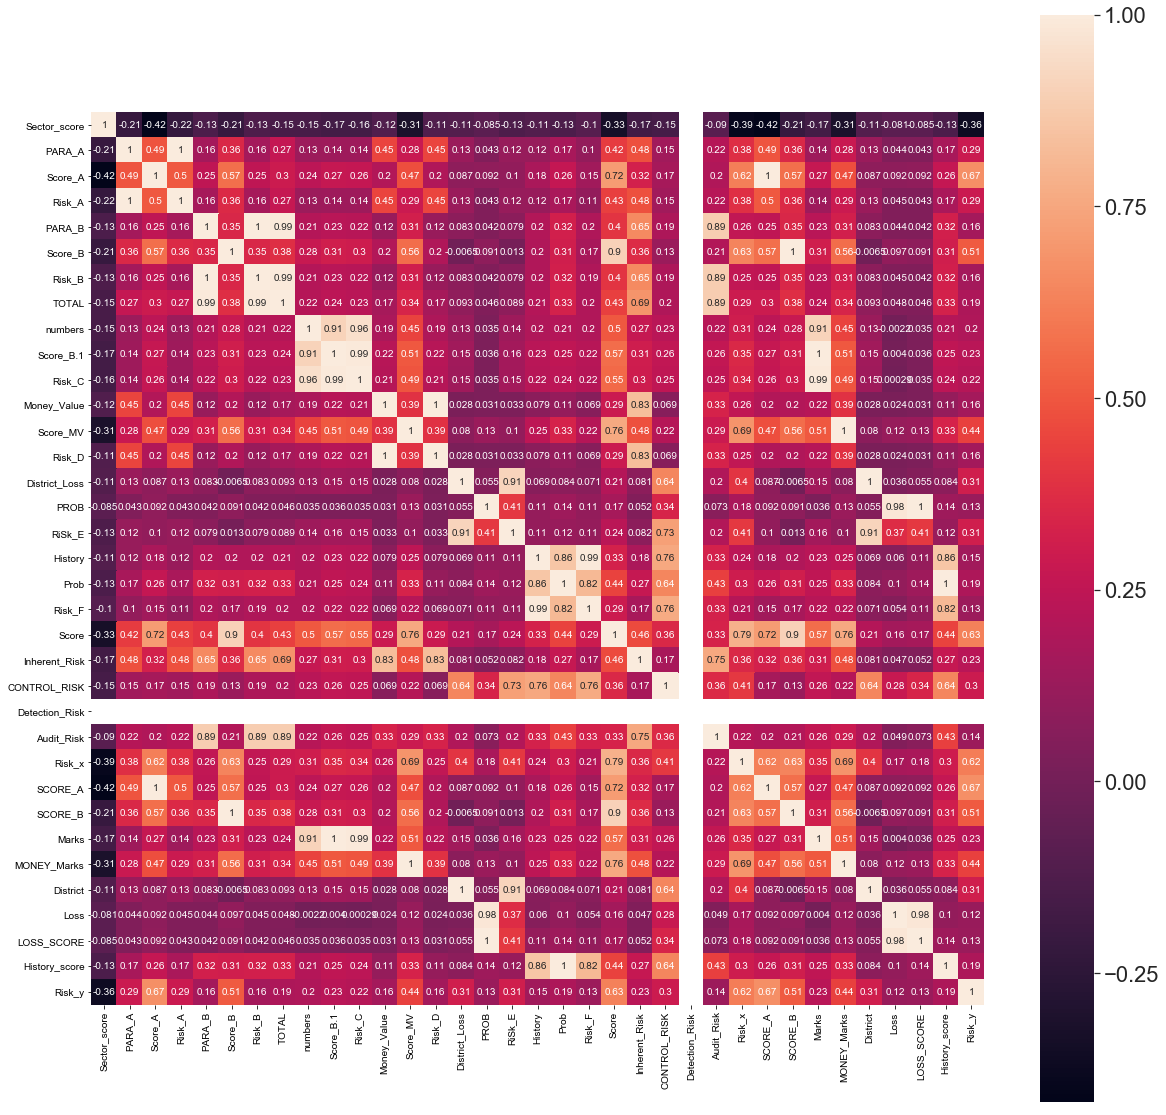

In [15]:
import seaborn as sns
fig = plt.subplots(figsize = (20,20))
sns.set(font_scale=2.0)
sns.heatmap(x.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

From the correlation heatmap, we can clearly observe the following:
#1.Detection_Risk contains a single value throughout the entire column and it will not provide any contribution to the model.
#2.From the heatmap,it is evident that there are many variables which are highly correlated.

Based on all these observations, the best solution is to drop 'Detection_Risk' and the highly correlated variables..

### Feedback - 1 :One of the feedbacks we received in Project-1 was "Observation with non-numeric value of Location ID should either be removed or Location_ID need to be imputed for those observations."

### Explanation and Solution: We have solved the problem by observing what are the unique column values present in the column and we observe that 'LOHARU', 'NUH' and 'SAFIDON' are non-numeric values which can be removed. So we removed these 3 rows respectively.

In [16]:
x['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [17]:
x.shape

(763, 36)

In [18]:
x = x[x['LOCATION_ID'] != 'LOHARU']

In [19]:
x = x[x['LOCATION_ID'] != 'NUH']

In [20]:
x = x[x['LOCATION_ID'] != 'SAFIDON']

### Reason for dropping 'LOCATION_ID' :<Mention Here>

#2.LOCATION_ID, which is not present in the heatmap,has 45 string values which have to be handled. When creating models, we may need to create dummy variables which may lead to an additional 45 variables. This will unncessarily complicate our model.

In [21]:
x.drop('Detection_Risk', axis=1, inplace=True)
x.drop('LOCATION_ID', axis=1, inplace=True)
x.shape

(760, 34)

In [22]:
x.drop('Risk_y', axis=1, inplace=True)

In [23]:
x.shape

(760, 33)

Now, before removing the highly correlated variables, it is essential to handle the outliers present in 'x'.

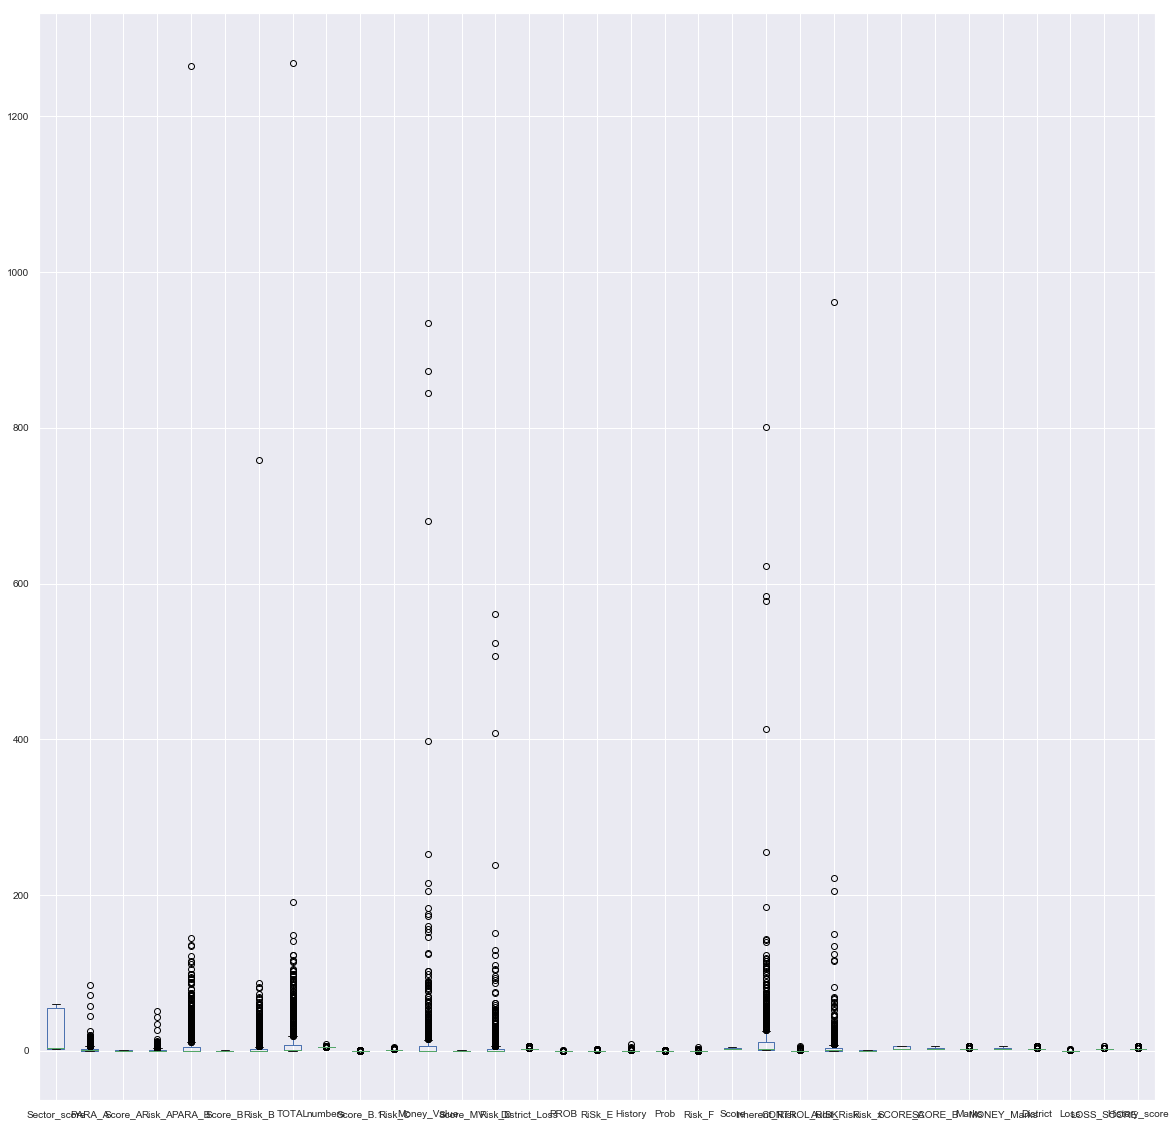

In [24]:
import matplotlib.pyplot as plt
ax = x.plot(kind='box',figsize=(20,20),legend=True, fontsize=10)
plt.show()

As we observe from the visualizations, it is clear that there are quite a lot of outliers.
We handle outliers by considering values which have zscore < 5.

In [25]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(x))
print(z)
x_out = x[(z < 5).all(axis=1)]
print(x.shape)
print(x_out.shape)

[[0.65875719 0.29359242 1.40816594 ... 0.16267116 0.16679542 0.24930945]
 [0.65875719 0.43662503 0.8859522  ... 0.16267116 0.16679542 0.24930945]
 [0.65875719 0.34753151 0.8859522  ... 0.16267116 0.16679542 0.24930945]
 ...
 [1.48223542 0.39469867 0.8859522  ... 0.16267116 0.16679542 0.24930945]
 [1.48223542 0.4016864  0.8859522  ... 0.16267116 0.16679542 0.24930945]
 [1.48223542 0.43662503 0.8859522  ... 0.16267116 0.16679542 0.24930945]]
(760, 33)
(713, 33)


After removing 47 rows containing outliers, the new dataframe 'x_out' contains 716 rows and 34 columns.Now, we can move on to removing the highly correlated variables. We remove the correlated variables by creating a user defined function that removes variables which are correlated beyond a specified threshold value. I set the threshold as 0.90 i.e I remove any variable which is more than 90% correlated with another variable.

In [26]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    dataset.drop(colname,inplace = True, axis = 1) # deleting the column from the dataset

correlation(x_out,0.99)

### Feedback - 2:One of the feedbacks we received in Project-1 was "Similar columns of different scale should be explained and then one of them should be removed."

### Explanation and Solution: We are running a correlation heatmap and have programmed a correlation handling user defined function, which in turn removes similar columns of different scale as they tend be highly correlated.This can be observed in the correlation heatmap given above. Some of the examples of such column pairs in this dataset are : (Score-A,SCORE_A), (Score-B,SCORE_B). and after the passing through the correlation function, SCORE_A,SCORE_B are other columns are removed respectively.

In [27]:
x_out.shape
print(x_out.nunique())
for variable in x_out:
    if df[variable].nunique()<25:
        print(variable,df[variable].unique())

(713, 18)

Sector_score      12
PARA_A           334
Score_A            3
PARA_B           325
Score_B            3
numbers            3
Money_Value      293
Score_MV           3
District_Loss      3
PROB               1
History            2
Score             17
Inherent_Risk    540
CONTROL_RISK       4
Audit_Risk       553
Risk_x             2
Loss               1
LOSS_SCORE         1
dtype: int64
Sector_score [ 3.89  3.41  2.72  2.37  1.99  1.85  2.36  2.34 15.56 17.68 21.61 59.85
 55.57]
Score_A [0.6 0.2 0.4]
Score_B [0.2 0.6 0.4]
numbers [5.  6.  5.5 6.5 9. ]
Score_MV [0.2 0.6 0.4]
District_Loss [2 4 6]
PROB [0.2 0.4 0.6]
History [0 1 2 3 9 5 4]
Score [2.4 2.  4.4 3.2 4.2 3.6 4.  2.2 3.  2.6 3.8 3.4 4.8 2.8 5.2 4.6 5. ]
CONTROL_RISK [0.4 1.2 0.8 1.6 2.2 5.8 2.  2.4 3.4 4.8 3.6]
Risk_x [1 0]
Loss [0 1 2]
LOSS_SCORE [2 4 6]


Now, after removing the correlated variables, the 'x_out' dataframe consists of 716 rows and 17 columns. But as we can clearly see, there are still 3 variables ie 'PROB', 'Loss' and 'LOSS_SCORE' having only 1 value each. So it is important to remove these variables as they will not contribute to the model. 

In [28]:
x_out.drop('PROB', axis=1, inplace=True)
x_out.drop('Loss', axis=1, inplace=True)
x_out.drop('LOSS_SCORE', axis=1, inplace=True)
x_out.shape

(713, 15)

Having cleaned the data completely, the next step is to assign the target variable for regression.
The target_variable here is audit_risk.So let us assign the target variable to 'y'.

In [29]:
y_reg = x_out['Audit_Risk']
y_clas = x_out['Risk_x']
x_out1 = x_out[x_out.columns]
x_out2 = x_out[x_out.columns]

In [30]:
x_out_reg = x_out.drop('Risk_x',axis = 1)

Now, that the target variable 'y' has been assigned, we can drop 'audit_risk' from x_out.

In [31]:
x_out_reg.drop('Audit_Risk',axis = 1,inplace = True)
print(x_out_reg.shape)

(713, 13)


In [32]:
x_out_reg.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'numbers',
       'Money_Value', 'Score_MV', 'District_Loss', 'History', 'Score',
       'Inherent_Risk', 'CONTROL_RISK'],
      dtype='object')

Now let us visualize a pairwise plotting of all variables.

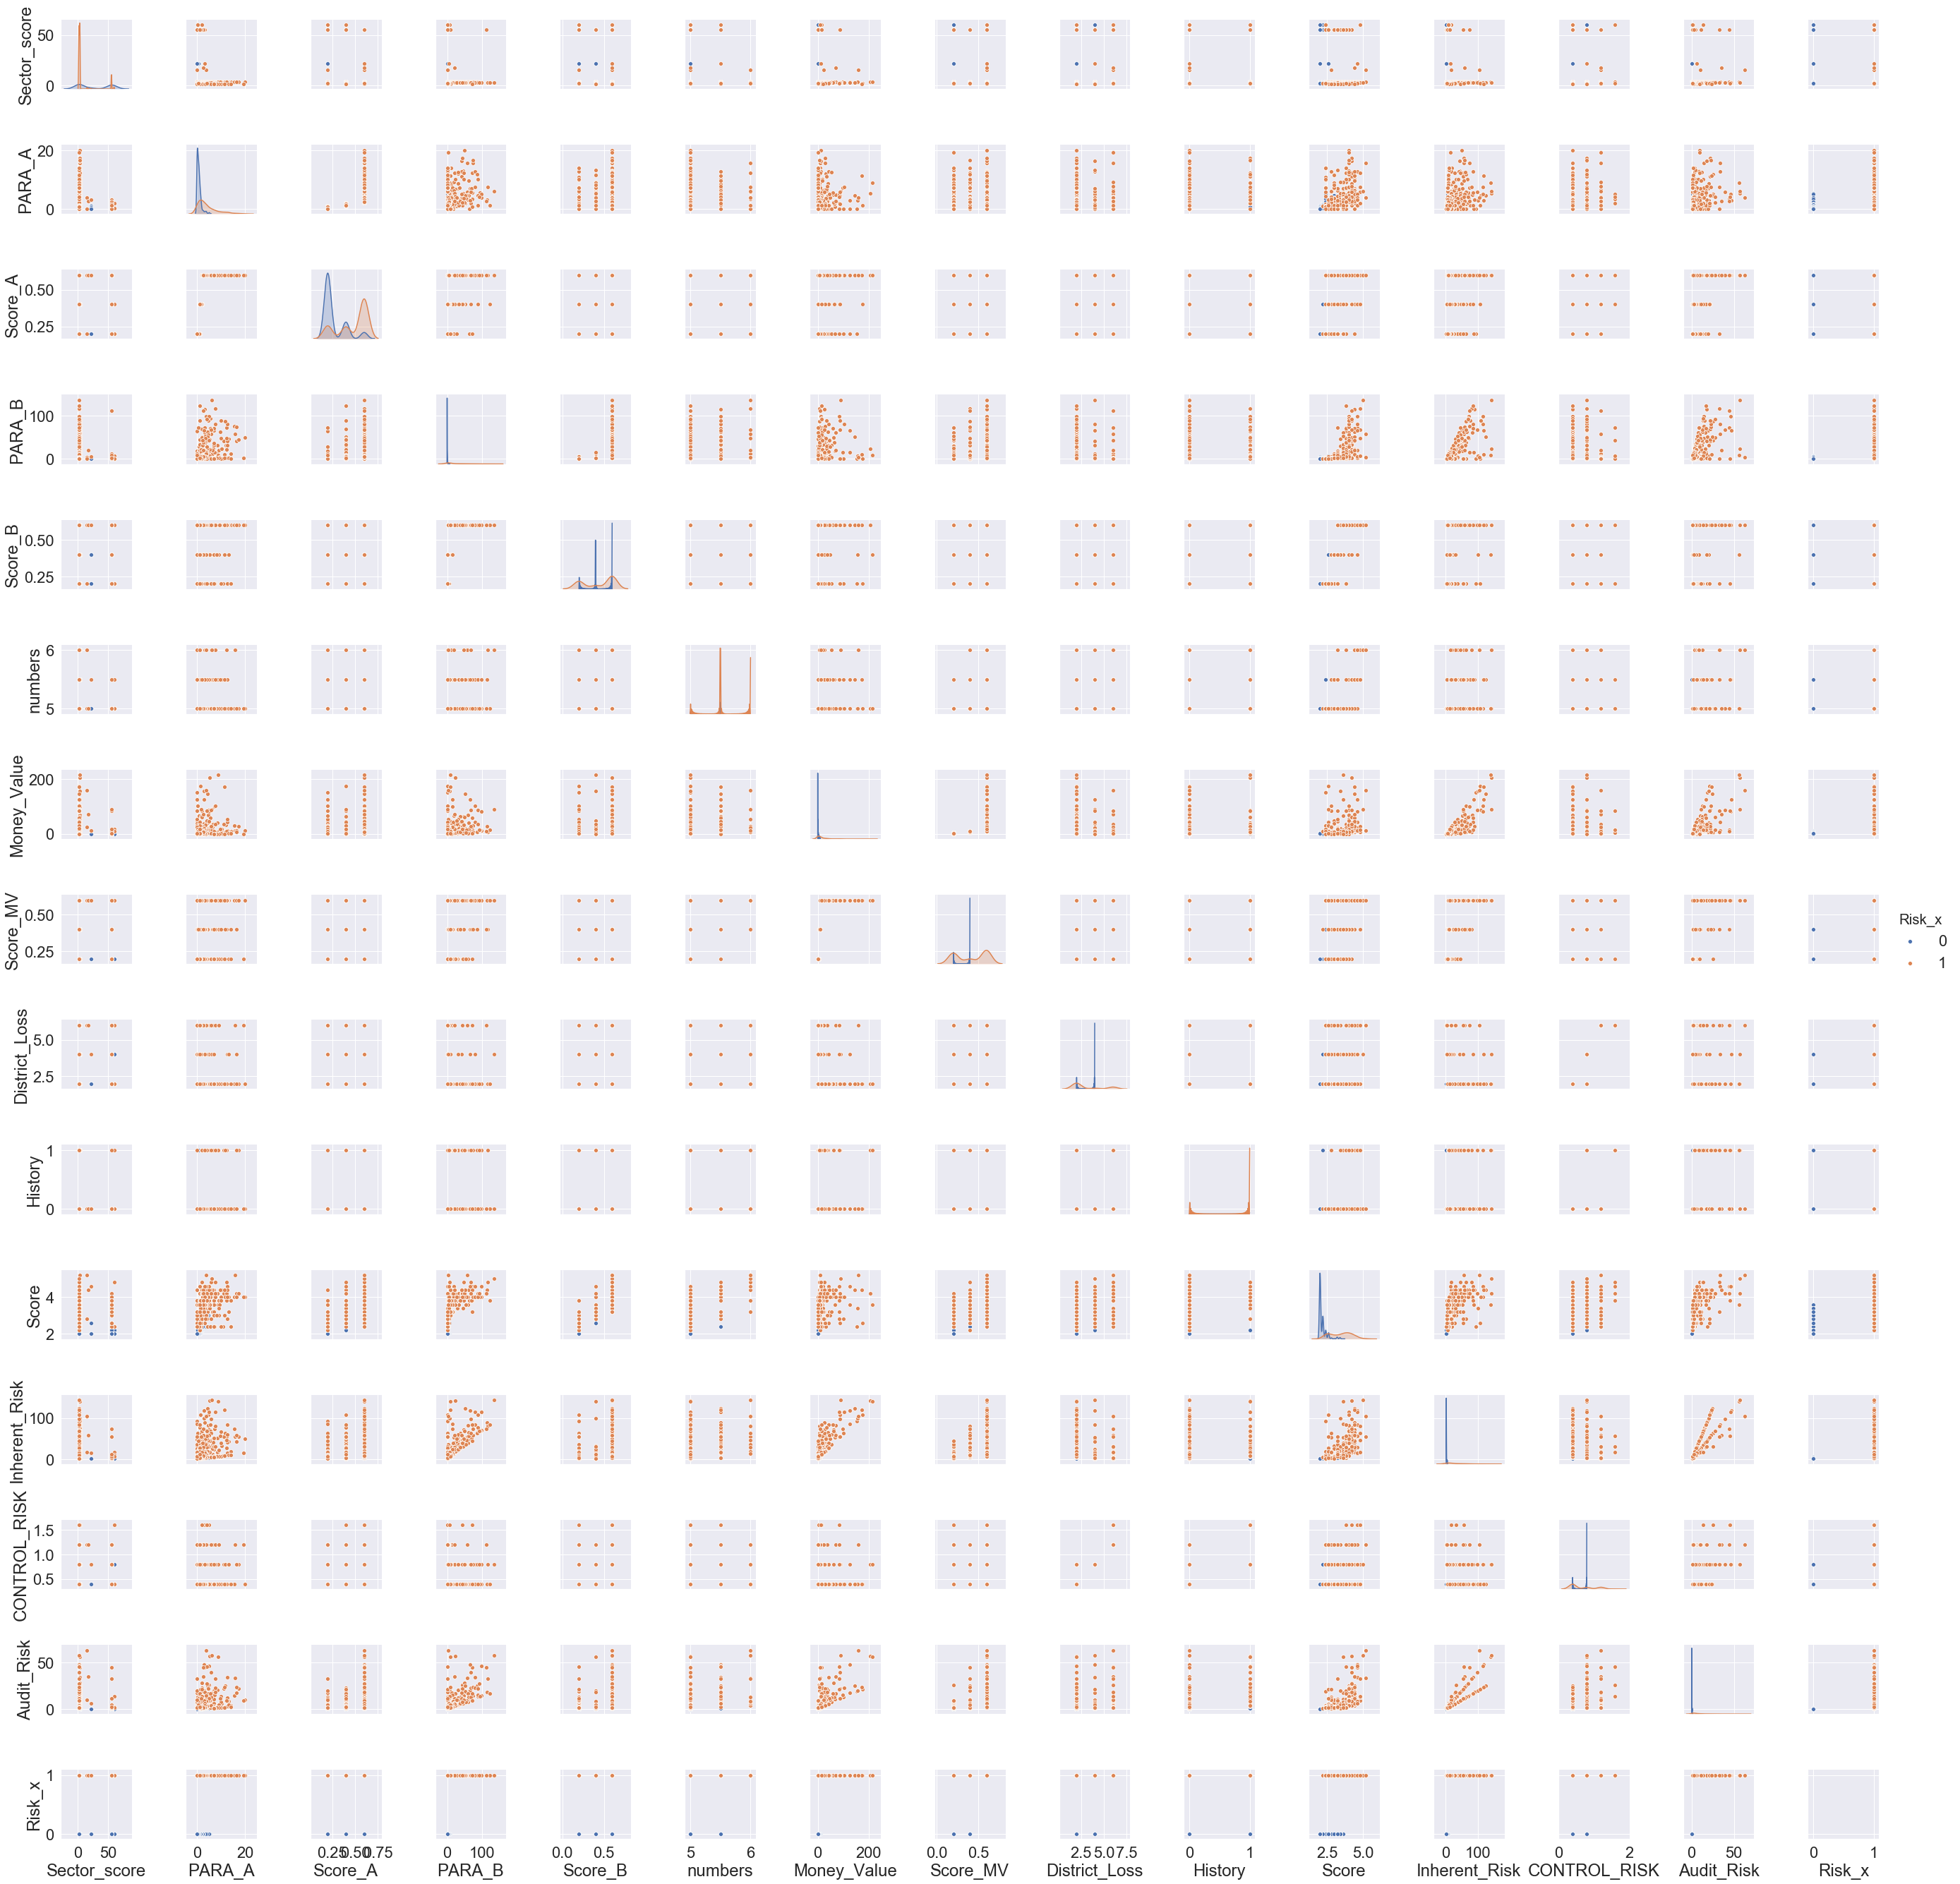

In [33]:
#Visualization to understand Risk's impact and Audit_Risk's behaviour.
import seaborn as sns
sns.pairplot(x_out,hue = 'Risk_x')

### Scaling and Justification for type of scaling used
Next, we can prepare the data for regression by scaling 'x_out'. The scaling method we are using is the Standard Scaler since the outliers have already been removed. Since a majority of the values in each column are very small,the data would unnecessarily be skewed if we use min-max scaling and so, we decide to use Standard Scaling. 

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y1 = np.array([number[0] for number in lb.fit_transform(y_clas)])
X_train_org, X_test_org, y_train, y_test = train_test_split(x_out_reg, y_clas, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


### Classification Task:

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

### Task 1 : Apply two voting classifiers - one with hard voting and one with soft voting

### Hard Voting

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [36]:
kfold =KFold(n_splits=5, random_state=0)
param_grid={'n_neighbors':range(1,10)}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search_knn.fit(X_train,y_train)

kfold =KFold(n_splits=5, random_state=0)
param_grid={'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_log = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search_log.fit(X_train,y_train)

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search_SVC = GridSearchCV(SVC(kernel = 'rbf',probability = True),param_grid, cv=kfold, return_train_score=True,scoring='f1');
grid_search_SVC.fit(X_train, y_train)


voting_clf = VotingClassifier(
    estimators=[('lr', grid_search_log), ('knn', grid_search_knn), ('svc', grid_search_SVC)], voting='hard')
voting_clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 10, 0.1, 1, 250, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

VotingClassifier(estimators=[('lr', GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs...     pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [39]:
from sklearn.metrics import f1_score
for clf in (grid_search_log, grid_search_knn, grid_search_SVC, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, f1_score(y_test, y_pred))

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

GridSearchCV 0.9904761904761905


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

GridSearchCV 0.9814814814814815


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 10, 0.1, 1, 250, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

GridSearchCV 0.9906542056074767


C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

VotingClassifier(estimators=[('lr', GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs...     pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

VotingClassifier 0.9906542056074767


In [40]:

kfold =KFold(n_splits=5, random_state=0)
param_grid={'n_neighbors':range(1,10)}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search_knn.fit(X_train,y_train)
# k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='f1').mean()


kfold =KFold(n_splits=5, random_state=0)
param_grid={'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_log = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search_log.fit(X_train,y_train)
# k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='f1').mean()

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search_SVC = GridSearchCV(SVC(kernel= 'rbf',probability = True),param_grid, cv=kfold, return_train_score=True,scoring='f1');
grid_search_SVC.fit(X_train, y_train)

# test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

voting_clf_soft = VotingClassifier(estimators=[('lr', grid_search_log), ('knn', grid_search_knn), ('svc', grid_search_SVC)],
                                   voting = 'soft')
voting_clf_soft.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 10, 0.1, 1, 250, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

VotingClassifier(estimators=[('lr', GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs...     pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [41]:
from sklearn.metrics import f1_score
for clf in (grid_search_log, grid_search_knn, grid_search_SVC, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, f1_score(y_test, y_pred))

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

GridSearchCV 0.9904761904761905


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

GridSearchCV 0.9814814814814815


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 10, 0.1, 1, 250, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

GridSearchCV 0.9906542056074767


C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

VotingClassifier(estimators=[('lr', GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs...     pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

VotingClassifier 0.9906542056074767


- Apply any two models with bagging and any two models with pasting.

### Bag 1 : LinearSVC

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,250,500],'max_samples':[50,75,100,150,200]}

grid_search = GridSearchCV(BaggingClassifier(LinearSVC(C=250),bootstrap=True,oob_score=True,random_state=0), param_grid, cv=3, return_train_score=True )
grid_search.fit(X_train,y_train)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=LinearSVC(C=250, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=True,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 250, 500], 'max_samples': [50, 75, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [44]:
print("parameters",grid_search.best_params_)

parameters {'max_samples': 50, 'n_estimators': 100}


In [45]:
from sklearn.svm import LinearSVC
bag_class = BaggingClassifier(LinearSVC(C=250), n_estimators=100, max_samples=50, bootstrap=True,oob_score=True,random_state=0)
bag_class.fit(X_train,y_train)
btr_score = bag_class.score(X_train,y_train)
bte_score = bag_class.score(X_test,y_test)
oob = bag_class.oob_score_

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

BaggingClassifier(base_estimator=LinearSVC(C=250, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=50, n_estimators=100, n_jobs=None, oob_score=True,
         random_state=0, verbose=0, warm_start=False)

In [46]:
print(btr_score)
print(bte_score)
print(oob)

1.0
0.994413407821229
1.0


### Bag 2 : SVC (Linear Kernel Trick)

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,250,500],'max_samples':[50,75,100,150,200]}

grid_search = GridSearchCV(BaggingClassifier(SVC(kernel='linear',C=250),bootstrap=True,oob_score=True,random_state=0), param_grid, cv=3, return_train_score=True )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=SVC(C=250, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=True,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 250, 500], 'max_samples': [50, 75, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [49]:
print("parameters",grid_search.best_params_)

parameters {'max_samples': 200, 'n_estimators': 200}


In [50]:
from sklearn.svm import SVC
bag_class = BaggingClassifier(SVC(kernel='linear',C=250), n_estimators=100, max_samples=200, bootstrap=True,oob_score=True,random_state=0)
bag_class.fit(X_train,y_train)
btr_score = bag_class.score(X_train,y_train)
bte_score = bag_class.score(X_test,y_test)
oob = bag_class.oob_score_

BaggingClassifier(base_estimator=SVC(C=250, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=200, n_estimators=100, n_jobs=None, oob_score=True,
         random_state=0, verbose=0, warm_start=False)

In [51]:
print(btr_score)
print(bte_score)
print(oob)

0.9962546816479401
0.994413407821229
0.9850187265917603


### Pasting

### Paste 1: RBF Kernel

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,250,500],'max_samples':[50,75,100,150,200]}

grid_search = GridSearchCV(BaggingClassifier(SVC(kernel='rbf',C= 100, gamma = 0.1),bootstrap=False,random_state=0), param_grid, cv=3, return_train_score=True )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 250, 500], 'max_samples': [50, 75, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [53]:
print("parameters",grid_search.best_params_)

parameters {'max_samples': 100, 'n_estimators': 100}


In [54]:
from sklearn.svm import SVC
bag_class = BaggingClassifier(SVC(kernel='rbf',C= 100, gamma = 0.1), n_estimators=100, max_samples=150, bootstrap=False,random_state=0)
bag_class.fit(X_train,y_train)
btr_score = bag_class.score(X_train,y_train)
bte_score = bag_class.score(X_test,y_test)

BaggingClassifier(base_estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=150, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [55]:
print(btr_score)
print(bte_score)

0.9794007490636704
0.9832402234636871


### Paste 2: Decision Tree

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,250,500],'max_samples':[50,75,100,150,200]}

grid_search = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),bootstrap=False,random_state=0), param_grid, cv=3, return_train_score=True )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 250, 500], 'max_samples': [50, 75, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [57]:
print("parameters",grid_search.best_params_)

parameters {'max_samples': 200, 'n_estimators': 100}


In [58]:
from sklearn.tree import DecisionTreeClassifier
bag_class = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=150, bootstrap=False,random_state=0)
bag_class.fit(X_train,y_train)
btr_score = bag_class.score(X_train,y_train)
bte_score = bag_class.score(X_test,y_test)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=150, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [59]:
print(btr_score)
print(bte_score)

0.9943820224719101
0.9888268156424581


### Task 3: Any 2 models with AdaBoost

### Adaboost 1: SVC Kernel Poly

In [60]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score , GridSearchCV

n_estimators_val = [10, 50, 100,200]
learning_rate_val = [0.1, 0.5, 1]

param_grid = dict(n_estimators = n_estimators_val, learning_rate=learning_rate_val)

ada_reg = AdaBoostClassifier(SVC(kernel='poly',C= 500, degree = 1),algorithm="SAMME", random_state=0)

adaboost_classifier = GridSearchCV(estimator=ada_reg, param_grid = param_grid )
adaboost_classifier.fit(X_train, y_train)
print ('Best Parameters: ',adaboost_classifier.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=50, random_state=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 100}


In [61]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(SVC(kernel='poly',C= 500, degree = 1), n_estimators=100, algorithm="SAMME", learning_rate=1, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          learning_rate=1, n_estimators=100, random_state=0)

In [62]:
adtr_score = ada_clf.score(X_train,y_train)
adte_score = ada_clf.score(X_test,y_test)

In [63]:
print(adtr_score)
print(adte_score)

0.9943820224719101
0.9888268156424581


### Adaboost 2: Decision Tree Classifier

In [64]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score , GridSearchCV

n_estimators_val = [10, 50, 100,200]
learning_rate_val = [0.1, 0.5, 1]

param_grid = dict(n_estimators = n_estimators_val, learning_rate=learning_rate_val)

ada_classifier = AdaBoostClassifier(DecisionTreeClassifier(),algorithm="SAMME.R", random_state=0)

adaboost_classifier = GridSearchCV(estimator=ada_reg, param_grid = param_grid )
adaboost_classifier.fit(X_train, y_train)
print ('Best Parameters: ',adaboost_classifier.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=50, random_state=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 100}


In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, algorithm="SAMME.R",learning_rate=1, random_state=0)
ada_clf.fit(X_train, y_train)
adtr_score = ada_clf.score(X_train,y_train)
adte_score = ada_clf.score(X_test,y_test)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=100, random_state=0)

In [66]:
print(adtr_score)
print(adte_score)

1.0
0.9888268156424581


### Task 4 : - Apply one model with gradient boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators_val = [50, 100, 200, 500]
learning_rate_val = [0.01, 0.1, 0.5, 1]
max_depth_val = [1, 2, 3, 4]

param_grid = dict(n_estimators = n_estimators_val, learning_rate=learning_rate_val, max_depth=max_depth_val)
gbrg = GradientBoostingClassifier(random_state=0)

gradientboost_classifier = GridSearchCV(estimator=gbrg, param_grid=param_grid)
gradientboost_classifier.fit(X_train, y_train)

print (gradientboost_classifier.best_params_)
print('Train score: {:.2f}'.format(gradientboost_classifier.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gradientboost_classifier.score(X_test, y_test)))

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200, 500], 'learning_rate': [0.01, 0.1, 0.5, 1], 'max_depth': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Train score: 1.00
Test score: 0.99


### Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?

# Model Evaluation Strategy and justification:
### From a business stand point, our business metric is to identify the fraudulent firm.
### The following are the four important standpoints:
### 1. True negative  -  Actual 'Not Fraud' is predicted as 'Not Fraud'.
### 2. False positive  - Actual 'Not Fraud' is predicted as ' Fraud'.
### 3. False negative -  Actual 'Fraud' is predicted as 'Not Fraud'.
### 4. True positive - Actual 'Fraud' is predicted as 'Fraud.
###  Since this is our highest priority, our goal is to minimize the False negative as much as possible and increase the True positive as much as possible.
### This can be determined by the recall score but there is also a chance that all the firms can be predicted as 'Fraud'.
### Therefore to balance between precision and recall, we decide to use the 'F1 score' for model evaluation. 

### Pre-PCA

### KNN Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier
kfold =KFold(n_splits=5, random_state=0)

param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_train,y_train)

k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='f1').mean()

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [69]:
print("Train:",grid_search.best_score_)
print("Test",k_test)
print("parameters",grid_search.best_params_)

Train: 0.9564154162872269
Test 0.8964367816091954
parameters {'n_neighbors': 1}


### Adding results to mr1(model_results 1)

In [70]:
pre_pca_class = pd.DataFrame(columns=('S.No','Model_Name','Parameters', 'Train_Score', 'Test_Score'))

In [71]:
pre_pca_class.loc[len(pre_pca_class)]=[1,'KNN Classifier',grid_search.best_params_,grid_search.best_score_,k_test]

In [72]:
pre_pca_class

S.No      Model_Name          Parameters  Train_Score  Test_Score
0    1  KNN Classifier  {'n_neighbors': 1}     0.956415    0.896437

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [76]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[122   4]
 [  5  48]]
              precision    recall  f1-score   support

   not fraud       0.96      0.97      0.96       126
       fraud       0.92      0.91      0.91        53

   micro avg       0.95      0.95      0.95       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.95      0.95      0.95       179



### Logistic Model

In [77]:
from sklearn.linear_model import LogisticRegression
kfold =KFold(n_splits=5, random_state=0)
param_grid={'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_train,y_train)

k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='f1').mean()

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no pre

In [78]:
print("Train:",grid_search.best_score_)
print("Test",k_test)
print("parameters",grid_search.best_params_)

Train: 0.9885345365706659
Test 0.9097630439735702
parameters {'C': 1000, 'penalty': 'l2'}


Adding results to mr1(model_results 1)

In [79]:
pre_pca_class.loc[len(pre_pca_class)]=[2,'Logistic Model',grid_search.best_params_,grid_search.best_score_,k_test]

In [80]:
pre_pca_class

S.No      Model_Name                    Parameters  Train_Score  Test_Score
0    1  KNN Classifier            {'n_neighbors': 1}     0.956415    0.896437
1    2  Logistic Model  {'C': 1000, 'penalty': 'l2'}     0.988535    0.909763

In [81]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no pre

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric 

In [82]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[123   3]
 [  6  47]]
              precision    recall  f1-score   support

   not fraud       0.95      0.98      0.96       126
       fraud       0.94      0.89      0.91        53

   micro avg       0.95      0.95      0.95       179
   macro avg       0.95      0.93      0.94       179
weighted avg       0.95      0.95      0.95       179



### Linear SVC

In [83]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search = GridSearchCV(LinearSVC(),param_grid, cv=kfold, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

In [84]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9859913594848545
Test 0.9240988835725679
parameters {'C': 500}


In [85]:
pre_pca_class.loc[len(pre_pca_class)]=[3,'Linear SVC',grid_search.best_params_,grid_search.best_score_,test]

In [86]:
pre_pca_class

S.No      Model_Name                    Parameters  Train_Score  Test_Score
0    1  KNN Classifier            {'n_neighbors': 1}     0.956415    0.896437
1    2  Logistic Model  {'C': 1000, 'penalty': 'l2'}     0.988535    0.909763
2    3      Linear SVC                    {'C': 500}     0.985991    0.924099

In [87]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Use

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

In [88]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[122   4]
 [  3  50]]
              precision    recall  f1-score   support

   not fraud       0.98      0.97      0.97       126
       fraud       0.93      0.94      0.93        53

   micro avg       0.96      0.96      0.96       179
   macro avg       0.95      0.96      0.95       179
weighted avg       0.96      0.96      0.96       179



### Linear SVC - Kernel Trick 

In [89]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=kfold, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [90]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9908161672908863
Test 0.9244444444444444
parameters {'C': 250}


In [91]:
pre_pca_class.loc[len(pre_pca_class)]=[4,'Linear SVC - Kernel Trick',grid_search.best_params_,grid_search.best_score_,test]

In [92]:
pre_pca_class

S.No                 Model_Name                    Parameters  Train_Score  \
0    1             KNN Classifier            {'n_neighbors': 1}     0.956415   
1    2             Logistic Model  {'C': 1000, 'penalty': 'l2'}     0.988535   
2    3                 Linear SVC                    {'C': 500}     0.985991   
3    4  Linear SVC - Kernel Trick                    {'C': 250}     0.990816   

   Test_Score  
0    0.896437  
1    0.909763  
2    0.924099  
3    0.924444

In [93]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [94]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[122   4]
 [  4  49]]
              precision    recall  f1-score   support

   not fraud       0.97      0.97      0.97       126
       fraud       0.92      0.92      0.92        53

   micro avg       0.96      0.96      0.96       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179



In [95]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [96]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9756554307116105
Test 0.9610939510939511
parameters {'C': 250, 'gamma': 0.001}


In [97]:
pre_pca_class.loc[len(pre_pca_class)]=[5,'Linear SVC - RBF',grid_search.best_params_,grid_search.best_score_,test]

In [98]:
pre_pca_class

S.No                 Model_Name                    Parameters  Train_Score  \
0    1             KNN Classifier            {'n_neighbors': 1}     0.956415   
1    2             Logistic Model  {'C': 1000, 'penalty': 'l2'}     0.988535   
2    3                 Linear SVC                    {'C': 500}     0.985991   
3    4  Linear SVC - Kernel Trick                    {'C': 250}     0.990816   
4    5           Linear SVC - RBF    {'C': 250, 'gamma': 0.001}     0.975655   

   Test_Score  
0    0.896437  
1    0.909763  
2    0.924099  
3    0.924444  
4    0.961094

In [99]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [100]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[122   4]
 [  3  50]]
              precision    recall  f1-score   support

   not fraud       0.98      0.97      0.97       126
       fraud       0.93      0.94      0.93        53

   micro avg       0.96      0.96      0.96       179
   macro avg       0.95      0.96      0.95       179
weighted avg       0.96      0.96      0.96       179



In [101]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'degree':[1,2,3,4]}
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no pre

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no pre

In [102]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9775988879583032
Test 0.9244444444444444
parameters {'C': 100, 'degree': 1}


In [103]:
pre_pca_class.loc[len(pre_pca_class)]=[6,'Linear SVC - Polynomial Kernel',grid_search.best_params_,grid_search.best_score_,test]

In [104]:
pre_pca_class

S.No                      Model_Name                    Parameters  \
0    1                  KNN Classifier            {'n_neighbors': 1}   
1    2                  Logistic Model  {'C': 1000, 'penalty': 'l2'}   
2    3                      Linear SVC                    {'C': 500}   
3    4       Linear SVC - Kernel Trick                    {'C': 250}   
4    5                Linear SVC - RBF    {'C': 250, 'gamma': 0.001}   
5    6  Linear SVC - Polynomial Kernel       {'C': 100, 'degree': 1}   

   Train_Score  Test_Score  
0     0.956415    0.896437  
1     0.988535    0.909763  
2     0.985991    0.924099  
3     0.990816    0.924444  
4     0.975655    0.961094  
5     0.977599    0.924444

In [105]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no pre

In [106]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[122   4]
 [  2  51]]
              precision    recall  f1-score   support

   not fraud       0.98      0.97      0.98       126
       fraud       0.93      0.96      0.94        53

   micro avg       0.97      0.97      0.97       179
   macro avg       0.96      0.97      0.96       179
weighted avg       0.97      0.97      0.97       179



In [107]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)
dt_tr_sc=cross_val_score(tree, X_train, y_train, cv=5,scoring ='f1').mean()
dt_te_sc=cross_val_score(tree, X_test, y_test, cv=5,scoring='f1').mean()
print(dt_tr_sc)
print(dt_te_sc)

0.9878284566838784
0.9904761904761905


In [108]:
pre_pca_class.loc[len(pre_pca_class)]=[7,'Decision Tree Classifier',"None",dt_tr_sc,dt_te_sc]

In [109]:
pre_pca_class

S.No                      Model_Name                    Parameters  \
0    1                  KNN Classifier            {'n_neighbors': 1}   
1    2                  Logistic Model  {'C': 1000, 'penalty': 'l2'}   
2    3                      Linear SVC                    {'C': 500}   
3    4       Linear SVC - Kernel Trick                    {'C': 250}   
4    5                Linear SVC - RBF    {'C': 250, 'gamma': 0.001}   
5    6  Linear SVC - Polynomial Kernel       {'C': 100, 'degree': 1}   
6    7        Decision Tree Classifier                          None   

   Train_Score  Test_Score  
0     0.956415    0.896437  
1     0.988535    0.909763  
2     0.985991    0.924099  
3     0.990816    0.924444  
4     0.975655    0.961094  
5     0.977599    0.924444  
6     0.987828    0.990476

In [110]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no pre

In [111]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[122   4]
 [  2  51]]
              precision    recall  f1-score   support

   not fraud       0.98      0.97      0.98       126
       fraud       0.93      0.96      0.94        53

   micro avg       0.97      0.97      0.97       179
   macro avg       0.96      0.97      0.96       179
weighted avg       0.97      0.97      0.97       179



In [112]:
pre_pca_class

S.No                      Model_Name                    Parameters  \
0    1                  KNN Classifier            {'n_neighbors': 1}   
1    2                  Logistic Model  {'C': 1000, 'penalty': 'l2'}   
2    3                      Linear SVC                    {'C': 500}   
3    4       Linear SVC - Kernel Trick                    {'C': 250}   
4    5                Linear SVC - RBF    {'C': 250, 'gamma': 0.001}   
5    6  Linear SVC - Polynomial Kernel       {'C': 100, 'degree': 1}   
6    7        Decision Tree Classifier                          None   

   Train_Score  Test_Score  
0     0.956415    0.896437  
1     0.988535    0.909763  
2     0.985991    0.924099  
3     0.990816    0.924444  
4     0.975655    0.961094  
5     0.977599    0.924444  
6     0.987828    0.990476

# Classification Post PCA

In [113]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.97)
pca.fit(X_train)
pca.n_components_

PCA(copy=True, iterated_power='auto', n_components=0.97, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

9

In [114]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [115]:
from sklearn.neighbors import KNeighborsClassifier
kfold =KFold(n_splits=5, random_state=0)

param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_train,y_train)

k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='f1').mean()

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [116]:
print("Train:",grid_search.best_score_)
print("Test",k_test)
print("parameters",grid_search.best_params_)

Train: 0.9606709982119714
Test 0.9023340961098398
parameters {'n_neighbors': 1}


### Adding results to post_pca_class(post_pca_classification_results)

In [117]:
post_pca_class = pd.DataFrame(columns=('S.No','Model_Name','Parameters', 'Train_Score', 'Test_Score'))

In [118]:
post_pca_class.loc[len(post_pca_class)]=[1,'KNN Classifier',grid_search.best_params_,grid_search.best_score_,k_test]

In [119]:
post_pca_class

S.No      Model_Name          Parameters  Train_Score  Test_Score
0    1  KNN Classifier  {'n_neighbors': 1}     0.960671    0.902334

In [120]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [121]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[123   3]
 [  5  48]]
              precision    recall  f1-score   support

   not fraud       0.96      0.98      0.97       126
       fraud       0.94      0.91      0.92        53

   micro avg       0.96      0.96      0.96       179
   macro avg       0.95      0.94      0.95       179
weighted avg       0.96      0.96      0.96       179



### Logistic Model

In [122]:
from sklearn.linear_model import LogisticRegression
kfold =KFold(n_splits=5, random_state=0)
param_grid={'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_train,y_train)

k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='f1').mean()

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no pre

In [123]:
print("Train:",grid_search.best_score_)
print("Test",k_test)
print("parameters",grid_search.best_params_)

Train: 0.9954170347494482
Test 0.9546251993620414
parameters {'C': 100, 'penalty': 'l1'}


Adding results to mr1(model_results 1)

In [124]:
post_pca_class.loc[len(post_pca_class)]=[2,'Logistic Model',grid_search.best_params_,grid_search.best_score_,k_test]

In [125]:
post_pca_class

S.No      Model_Name                   Parameters  Train_Score  Test_Score
0    1  KNN Classifier           {'n_neighbors': 1}     0.960671    0.902334
1    2  Logistic Model  {'C': 100, 'penalty': 'l1'}     0.995417    0.954625

In [126]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\919

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no pre

In [127]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[124   2]
 [  2  51]]
              precision    recall  f1-score   support

   not fraud       0.98      0.98      0.98       126
       fraud       0.96      0.96      0.96        53

   micro avg       0.98      0.98      0.98       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.98      0.98      0.98       179



### Linear SVC

In [128]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search = GridSearchCV(LinearSVC(),param_grid, cv=kfold, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

In [129]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9928814311058547
Test 0.9441113653699466
parameters {'C': 100}


In [130]:
post_pca_class.loc[len(post_pca_class)]=[3,'Linear SVC',grid_search.best_params_,grid_search.best_score_,test]

In [131]:
post_pca_class

S.No      Model_Name                   Parameters  Train_Score  Test_Score
0    1  KNN Classifier           {'n_neighbors': 1}     0.960671    0.902334
1    2  Logistic Model  {'C': 100, 'penalty': 'l1'}     0.995417    0.954625
2    3      Linear SVC                   {'C': 100}     0.992881    0.944111

In [132]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [133]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[123   3]
 [  3  50]]
              precision    recall  f1-score   support

   not fraud       0.98      0.98      0.98       126
       fraud       0.94      0.94      0.94        53

   micro avg       0.97      0.97      0.97       179
   macro avg       0.96      0.96      0.96       179
weighted avg       0.97      0.97      0.97       179



### Linear SVC - Kernel Trick 

In [134]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=kfold, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [135]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9905998003856341
Test 0.9255003450655626
parameters {'C': 250}


In [136]:
post_pca_class.loc[len(post_pca_class)]=[4,'Linear SVC - Kernel Trick',grid_search.best_params_,grid_search.best_score_,test]

In [137]:
post_pca_class

S.No                 Model_Name                   Parameters  Train_Score  \
0    1             KNN Classifier           {'n_neighbors': 1}     0.960671   
1    2             Logistic Model  {'C': 100, 'penalty': 'l1'}     0.995417   
2    3                 Linear SVC                   {'C': 100}     0.992881   
3    4  Linear SVC - Kernel Trick                   {'C': 250}     0.990600   

   Test_Score  
0    0.902334  
1    0.954625  
2    0.944111  
3    0.925500

In [138]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [139]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[122   4]
 [  3  50]]
              precision    recall  f1-score   support

   not fraud       0.98      0.97      0.97       126
       fraud       0.93      0.94      0.93        53

   micro avg       0.96      0.96      0.96       179
   macro avg       0.95      0.96      0.95       179
weighted avg       0.96      0.96      0.96       179



In [140]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [141]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9775280898876404
Test 0.9556885456885457
parameters {'C': 250, 'gamma': 0.01}


In [142]:
post_pca_class.loc[len(post_pca_class)]=[5,'Linear SVC - RBF',grid_search.best_params_,grid_search.best_score_,test]

In [143]:
post_pca_class

S.No                 Model_Name                   Parameters  Train_Score  \
0    1             KNN Classifier           {'n_neighbors': 1}     0.960671   
1    2             Logistic Model  {'C': 100, 'penalty': 'l1'}     0.995417   
2    3                 Linear SVC                   {'C': 100}     0.992881   
3    4  Linear SVC - Kernel Trick                   {'C': 250}     0.990600   
4    5           Linear SVC - RBF    {'C': 250, 'gamma': 0.01}     0.977528   

   Test_Score  
0    0.902334  
1    0.954625  
2    0.944111  
3    0.925500  
4    0.955689

In [144]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [145]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[122   4]
 [  3  50]]
              precision    recall  f1-score   support

   not fraud       0.98      0.97      0.97       126
       fraud       0.93      0.94      0.93        53

   micro avg       0.96      0.96      0.96       179
   macro avg       0.95      0.96      0.95       179
weighted avg       0.96      0.96      0.96       179



In [146]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'degree':[1,2,3,4]}
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to F

In [147]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9828619652698741
Test 0.9164433811802233
parameters {'C': 500, 'degree': 1}


In [148]:
post_pca_class.loc[len(post_pca_class)]=[6,'Linear SVC - Polynomial Kernel',grid_search.best_params_,grid_search.best_score_,test]

In [149]:
post_pca_class

S.No                      Model_Name                   Parameters  \
0    1                  KNN Classifier           {'n_neighbors': 1}   
1    2                  Logistic Model  {'C': 100, 'penalty': 'l1'}   
2    3                      Linear SVC                   {'C': 100}   
3    4       Linear SVC - Kernel Trick                   {'C': 250}   
4    5                Linear SVC - RBF    {'C': 250, 'gamma': 0.01}   
5    6  Linear SVC - Polynomial Kernel      {'C': 500, 'degree': 1}   

   Train_Score  Test_Score  
0     0.960671    0.902334  
1     0.995417    0.954625  
2     0.992881    0.944111  
3     0.990600    0.925500  
4     0.977528    0.955689  
5     0.982862    0.916443

In [150]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to F

In [151]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[122   4]
 [  4  49]]
              precision    recall  f1-score   support

   not fraud       0.97      0.97      0.97       126
       fraud       0.92      0.92      0.92        53

   micro avg       0.96      0.96      0.96       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179



In [152]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)
dt_tr_sc=cross_val_score(tree, X_train, y_train, cv=5,scoring ='f1').mean()
dt_te_sc=cross_val_score(tree, X_test, y_test, cv=5,scoring='f1').mean()
print(dt_tr_sc)
print(dt_te_sc)

0.9533134655022204
0.8939621781727045


In [153]:
post_pca_class.loc[len(post_pca_class)]=[7,'Decision Tree Classifier',"None",dt_tr_sc,dt_te_sc]

In [154]:
post_pca_class

S.No                      Model_Name                   Parameters  \
0    1                  KNN Classifier           {'n_neighbors': 1}   
1    2                  Logistic Model  {'C': 100, 'penalty': 'l1'}   
2    3                      Linear SVC                   {'C': 100}   
3    4       Linear SVC - Kernel Trick                   {'C': 250}   
4    5                Linear SVC - RBF    {'C': 250, 'gamma': 0.01}   
5    6  Linear SVC - Polynomial Kernel      {'C': 500, 'degree': 1}   
6    7        Decision Tree Classifier                         None   

   Train_Score  Test_Score  
0     0.960671    0.902334  
1     0.995417    0.954625  
2     0.992881    0.944111  
3     0.990600    0.925500  
4     0.977528    0.955689  
5     0.982862    0.916443  
6     0.953313    0.893962

In [155]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to F

In [156]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["not fraud", "fraud"]))

Confusion matrix:
[[122   4]
 [  4  49]]
              precision    recall  f1-score   support

   not fraud       0.97      0.97      0.97       126
       fraud       0.92      0.92      0.92        53

   micro avg       0.96      0.96      0.96       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179



In [157]:
post_pca_class

S.No                      Model_Name                   Parameters  \
0    1                  KNN Classifier           {'n_neighbors': 1}   
1    2                  Logistic Model  {'C': 100, 'penalty': 'l1'}   
2    3                      Linear SVC                   {'C': 100}   
3    4       Linear SVC - Kernel Trick                   {'C': 250}   
4    5                Linear SVC - RBF    {'C': 250, 'gamma': 0.01}   
5    6  Linear SVC - Polynomial Kernel      {'C': 500, 'degree': 1}   
6    7        Decision Tree Classifier                         None   

   Train_Score  Test_Score  
0     0.960671    0.902334  
1     0.995417    0.954625  
2     0.992881    0.944111  
3     0.990600    0.925500  
4     0.977528    0.955689  
5     0.982862    0.916443  
6     0.953313    0.893962

In [158]:
pre_pca_class

S.No                      Model_Name                    Parameters  \
0    1                  KNN Classifier            {'n_neighbors': 1}   
1    2                  Logistic Model  {'C': 1000, 'penalty': 'l2'}   
2    3                      Linear SVC                    {'C': 500}   
3    4       Linear SVC - Kernel Trick                    {'C': 250}   
4    5                Linear SVC - RBF    {'C': 250, 'gamma': 0.001}   
5    6  Linear SVC - Polynomial Kernel       {'C': 100, 'degree': 1}   
6    7        Decision Tree Classifier                          None   

   Train_Score  Test_Score  
0     0.956415    0.896437  
1     0.988535    0.909763  
2     0.985991    0.924099  
3     0.990816    0.924444  
4     0.975655    0.961094  
5     0.977599    0.924444  
6     0.987828    0.990476

# Does PCA help in getting better results?

#1.Before PCA, the best model was the Decision Tree Classifier with a train score of 0.99 and a test score of 0.98
#2.After PCA, the best model was Linear SVC with a train score of 0.98 and a test score of 0.97.
#3.There seems to be a marginal improvement in some of the models after PCA but there also seems to be a decrease in some models. So we cannot conlusively say that PCA helps in getting better results.

## Additional Classification Model : Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [25,50,100,200,300,400,500]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=kfold, return_train_score=True,scoring='f1');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='f1').mean();

C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\91909\.conda\envs\tensorf

In [162]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9707203257103817
Test 0.926969696969697
parameters {'n_estimators': 50}


### - Task 5: Apply deep learning models covered in class

# 1. Perceptron

In [163]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [164]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(20, input_dim = 9, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 75, batch_size = 200);

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/75
534/534 [==============================] - 0s 493us/sample - loss: 0.6306 - acc: 0.3914
Epoch 2/75
534/534 [==============================] - 0s 13us/sample - loss: 0.6136 - acc: 0.5337
Epoch 3/75
534/534 [==============================] - 0s 15us/sample - loss: 0.5973 - acc: 0.5581
Epoch 4/75
534/534 [==============================] - 0s 11us/sample - loss: 0.5811 - acc: 0.5581
Epoch 5/75
534/534 [==============================] - 0s 13us/sample - loss: 0.5662 - acc: 0.5637
Epoch 6/75
534/534 [==============================] - 0s 13us/sample - loss: 0.5514 - acc: 0.6255
Epoch 7/75
534/534 [==============================] - 0s 11us/sample - loss: 0.5371 - acc: 0.7322
Epoch 8/75
534/534 [==============================] - 0s 13us/sample - loss: 0.5236 - acc: 0.8146
Epoch 9/75
534/534 [==============================] - 0s 13us/sample - loss: 0.5109 - acc: 0.81

### Perceptron Evaluation Metrics

In [165]:
model1.evaluate(X_train, y_train)

534/534 [==============================] - 0s 256us/sample - loss: 0.1465 - acc: 0.9663


[0.14647213601217735, 0.96629214]

In [166]:
model1.evaluate(X_test, y_test)

179/179 [==============================] - 0s 33us/sample - loss: 0.1349 - acc: 0.9777


[0.1349417121050744, 0.9776536]

### Perceptron F-1 Score

In [167]:
train_pred=model1.predict_classes(X_train)
pred=model1.predict_classes(X_test)

In [168]:
from sklearn.metrics import f1_score

print("train",f1_score(y_train, train_pred))
print("test",f1_score(y_test,pred))

train 0.9565217391304348
test 0.9629629629629629


# 2.Multi-Level Perceptron

In [169]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(30, input_dim = 9, activation = 'relu'))
#hidden layers
model1.add(Dense(20, activation = 'relu'))
model1.add(Dense(10, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 100, batch_size = 200);

Epoch 1/100
534/534 [==============================] - 0s 674us/sample - loss: 0.7060 - acc: 0.6685
Epoch 2/100
534/534 [==============================] - 0s 13us/sample - loss: 0.6616 - acc: 0.7154
Epoch 3/100
534/534 [==============================] - 0s 15us/sample - loss: 0.6217 - acc: 0.7453
Epoch 4/100
534/534 [==============================] - 0s 15us/sample - loss: 0.5859 - acc: 0.7809
Epoch 5/100
534/534 [==============================] - 0s 15us/sample - loss: 0.5530 - acc: 0.8296
Epoch 6/100
534/534 [==============================] - 0s 17us/sample - loss: 0.5240 - acc: 0.8446
Epoch 7/100
534/534 [==============================] - 0s 17us/sample - loss: 0.4970 - acc: 0.8614
Epoch 8/100
534/534 [==============================] - 0s 17us/sample - loss: 0.4714 - acc: 0.8783
Epoch 9/100
534/534 [==============================] - 0s 17us/sample - loss: 0.4468 - acc: 0.8839
Epoch 10/100
534/534 [==============================] - 0s 15us/sample - loss: 0.4229 - acc: 0.8914
Epoch 11

534/534 [==============================] - 0s 15us/sample - loss: 0.0362 - acc: 0.9869
Epoch 84/100
534/534 [==============================] - 0s 15us/sample - loss: 0.0359 - acc: 0.9869
Epoch 85/100
534/534 [==============================] - 0s 15us/sample - loss: 0.0356 - acc: 0.9869
Epoch 86/100
534/534 [==============================] - 0s 15us/sample - loss: 0.0353 - acc: 0.9869
Epoch 87/100
534/534 [==============================] - 0s 13us/sample - loss: 0.0349 - acc: 0.9869
Epoch 88/100
534/534 [==============================] - 0s 15us/sample - loss: 0.0347 - acc: 0.9869
Epoch 89/100
534/534 [==============================] - 0s 15us/sample - loss: 0.0344 - acc: 0.9869
Epoch 90/100
534/534 [==============================] - 0s 17us/sample - loss: 0.0341 - acc: 0.9869
Epoch 91/100
534/534 [==============================] - 0s 17us/sample - loss: 0.0338 - acc: 0.9869
Epoch 92/100
534/534 [==============================] - 0s 15us/sample - loss: 0.0336 - acc: 0.9869
Epoch 93/100


### Multi Layer Perceptron Evaluation Metrics

In [170]:
model1.evaluate(X_train, y_train)

534/534 [==============================] - 0s 325us/sample - loss: 0.0315 - acc: 0.9869


[0.03145880427923095, 0.9868914]

In [171]:
model1.evaluate(X_test, y_test)

179/179 [==============================] - 0s 28us/sample - loss: 0.0437 - acc: 0.9888


[0.04373141031649858, 0.9888268]

### Multi Layer Perceptron F-1 Scores

In [172]:
train_pred=model1.predict_classes(X_train)
pred=model1.predict_classes(X_test)

In [173]:
from sklearn.metrics import f1_score

print("train",f1_score(y_train, train_pred))
print("test",f1_score(y_test,pred))

train 0.9828850855745721
test 0.9814814814814815


# Conclusion:

#1.Two Voting Classifiers(with models KNN,Logistic,RBF Kernel)- One with hard voting and one with soft voting were applied.
#2.Two models with bagging(Linear SVC, SVC Kernel) and two models with pasting(RBF Kernel,Decision Tree Classifier) were applied.
#3.Two models with adaboost boosting(SVC Polynomial Kernel Trick,Decision Tree Classifier) were applied.
#4.One model with gradient boosting was applied.
#5.The following models were applied before PCA and after PCA:
  #a.KNN Classifier
  #b.Logistic Regression
  #c.Linear SVC
  #d.SVC - 'Linear' Kernel Trick
  #e.SVC - 'Polynomial' Kernel Trick
  #f.SVC - 'RBF' Kernel Trick
  #g.Decision Tree Classifier
  #The results were compared and the explanation of whether PCA yields better results was given.
#6.Two Deep Learning models( Perceptron and Multi Layer Perceptron) were applied.